In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
students_data = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
students_data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

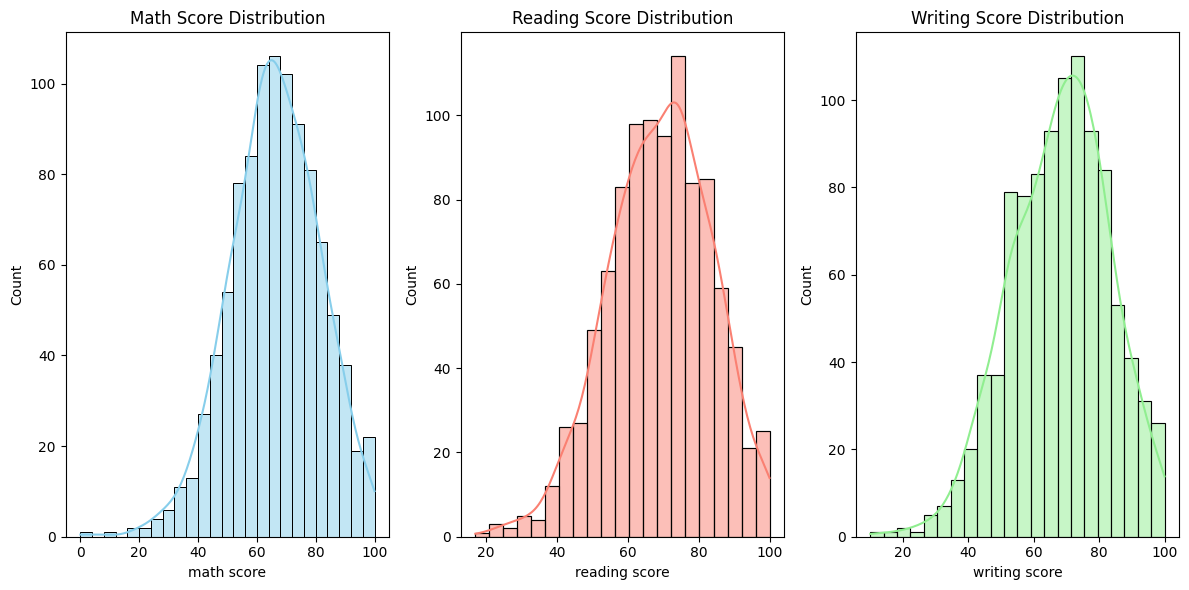

In [ ]:
# Data Analysis and visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(students_data['math score'], kde=True, color='skyblue')
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(students_data['reading score'], kde=True, color='salmon')
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(students_data['writing score'], kde=True, color='lightgreen')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

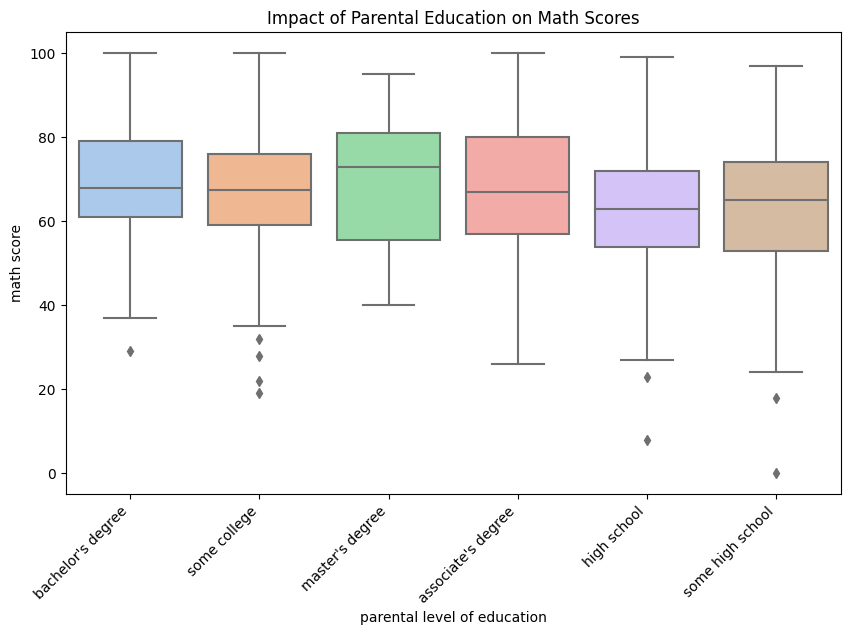

In [ ]:
#Explore factors influencing scores
# Analyzing the impact of parental education level on students' performance
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=students_data, palette='pastel')
plt.title('Impact of Parental Education on Math Scores')
plt.xticks(rotation=45, ha='right')
plt.show()

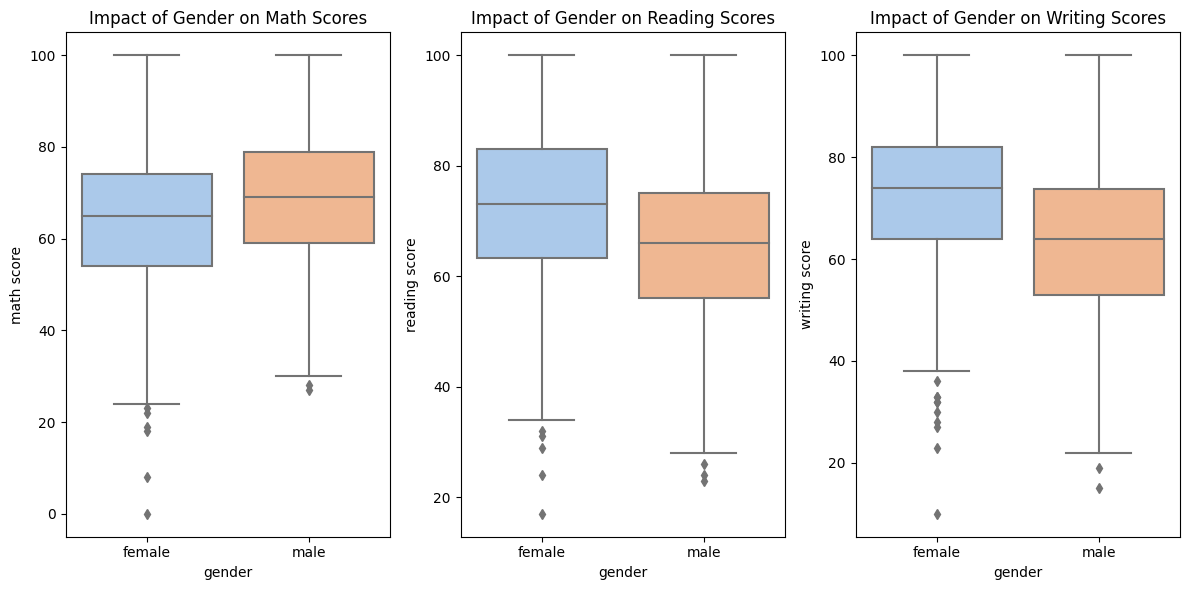

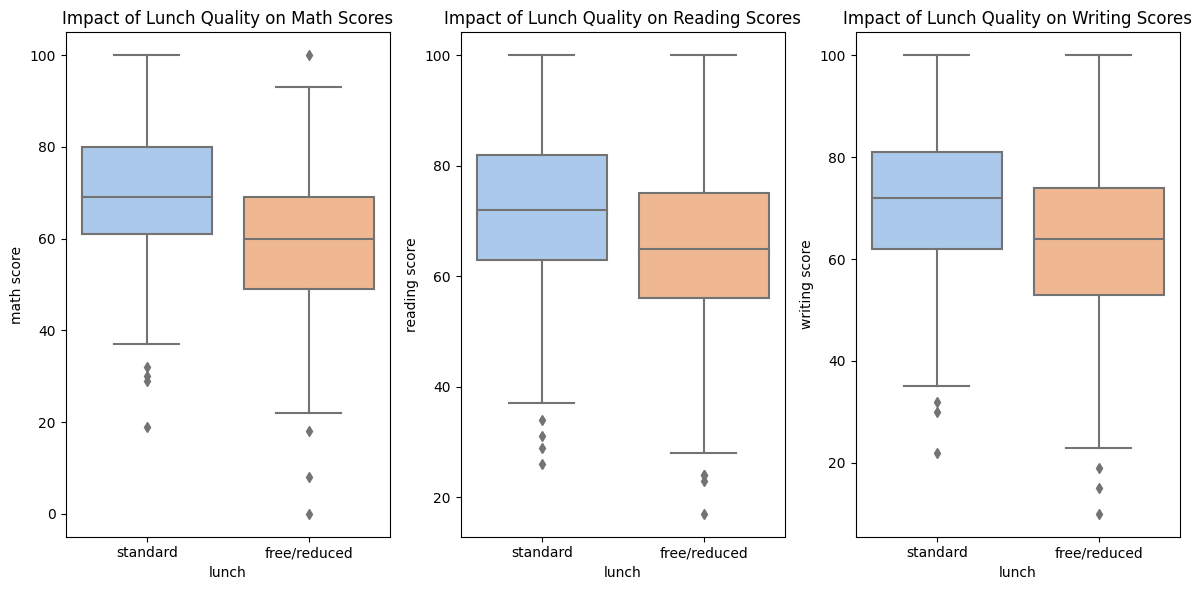

In [ ]:
# Exploring the impact of gender on test scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=students_data, palette='pastel')
plt.title('Impact of Gender on Math Scores')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading score', data=students_data, palette='pastel')
plt.title('Impact of Gender on Reading Scores')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing score', data=students_data, palette='pastel')
plt.title('Impact of Gender on Writing Scores')

plt.tight_layout()
plt.show()

# Exploring the impact of lunch quality on test scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='lunch', y='math score', data=students_data, palette='pastel')
plt.title('Impact of Lunch Quality on Math Scores')

plt.subplot(1, 3, 2)
sns.boxplot(x='lunch', y='reading score', data=students_data, palette='pastel')
plt.title('Impact of Lunch Quality on Reading Scores')

plt.subplot(1, 3, 3)
sns.boxplot(x='lunch', y='writing score', data=students_data, palette='pastel')
plt.title('Impact of Lunch Quality on Writing Scores')

plt.tight_layout()
plt.show()

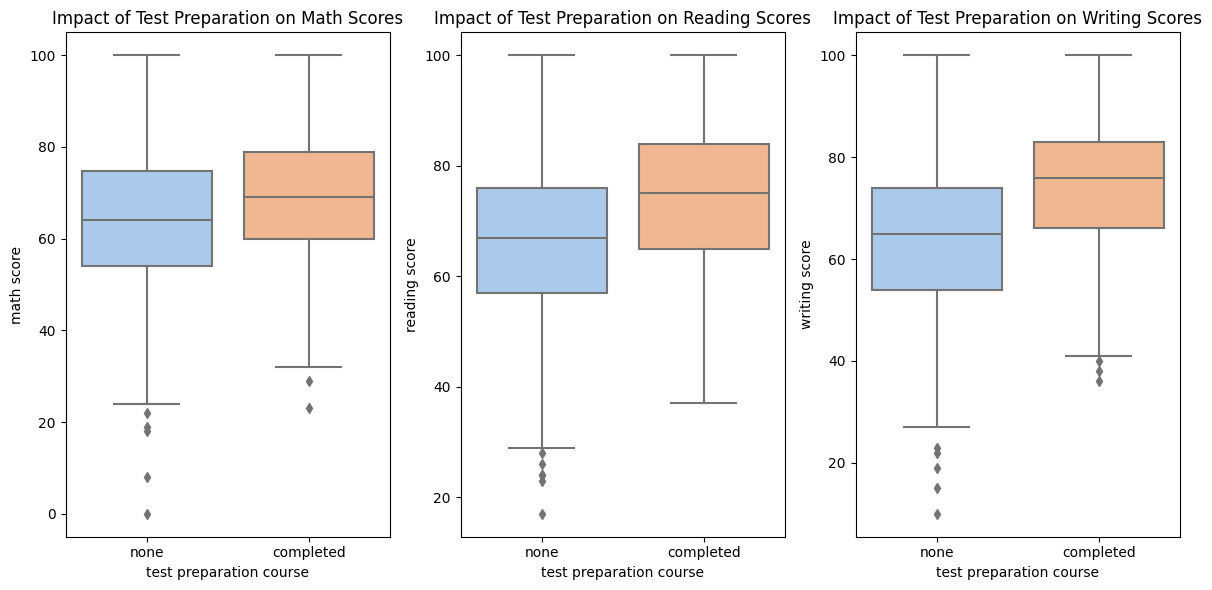

In [ ]:
# Exploring the impact of test preparation on test scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='test preparation course', y='math score', data=students_data, palette='pastel')
plt.title('Impact of Test Preparation on Math Scores')

plt.subplot(1, 3, 2)
sns.boxplot(x='test preparation course', y='reading score', data=students_data, palette='pastel')
plt.title('Impact of Test Preparation on Reading Scores')

plt.subplot(1, 3, 3)
sns.boxplot(x='test preparation course', y='writing score', data=students_data, palette='pastel')
plt.title('Impact of Test Preparation on Writing Scores')

plt.tight_layout()
plt.show()


In [ ]:
# Statistical Analysis: Correlation between scores
correlation_matrix = students_data[['math score', 'reading score', 'writing score']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


In [ ]:
# Predictive Model: Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = students_data[['math score', 'reading score']]
y = students_data['writing score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)


Mean Squared Error: 23.665243336391317


In [ ]:
# Advanced Statistical Analysis: Multiple Linear Regression
import statsmodels.api as sm

# Prepare features (X) and target variable (y)
X_multiple = students_data[['math score', 'reading score', 'test preparation course']]
X_multiple = pd.get_dummies(X_multiple, columns=['test preparation course'], drop_first=True)  # Convert categorical to dummy variables
X_multiple = sm.add_constant(X_multiple)  # Add a constant term for the intercept
y_multiple = students_data['writing score']

# Fit the multiple linear regression model
model_multiple = sm.OLS(y_multiple, X_multiple).fit()

# Display the regression summary
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:          writing score   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3826.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:46:57   Log-Likelihood:                -2875.6
No. Observations:                1000   AIC:                             5759.
Df Residuals:                     996   BIC:                             5779.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

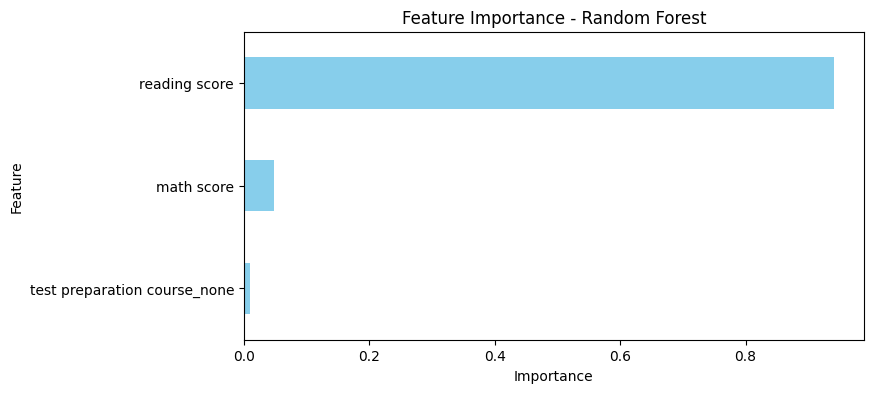

In [ ]:
# Feature Importance Analysis: Random Forest
from sklearn.ensemble import RandomForestRegressor

# Prepare features and target variable
X_rf = students_data[['math score', 'reading score', 'test preparation course']]
X_rf = pd.get_dummies(X_rf, columns=['test preparation course'], drop_first=True)  # Convert categorical to dummy variables
y_rf = students_data['writing score']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Build and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

# Feature Importance
feature_importance = pd.Series(model_rf.feature_importances_, index=X_rf.columns).sort_values()

# Plot feature importance
plt.figure(figsize=(8, 4))
feature_importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Evaluate the Random Forest model
y_pred_rf = model_rf.predict(X_test_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
print("\nRandom Forest Mean Squared Error:", mse_rf)


Random Forest Mean Squared Error: 26.438697242670855
